# Merging All Dataframes
## 90-803 Machine Learning Foundations with Python (Spring 2024)
### Team 17: Yoko, Tessa, Hannah

In [17]:
import pandas as pd
import seaborn as sns
import geopandas as gpd

## Read Data

In [18]:
home_values = pd.read_csv("homevalues.csv")
home_values.drop(columns=['Unnamed: 0'], inplace=True)
home_values.head(5)

,Date,Year,Month,RegionID,SizeRank,RegionName,RegionType,StateName,State,StateCodeFIPS,MunicipalCodeFIPS,Bottom-Tier Average Home Value Estimate,Top-Tier Average Home Value Estimate
0,2000-01-31,2000,1,3101,0,Los Angeles County,county,CA,CA,6,37,122826.545216,400192.738911
1,2000-01-31,2000,1,139,1,Cook County,county,IL,IL,17,31,71689.188026,302264.545103
2,2000-01-31,2000,1,1090,2,Harris County,county,TX,TX,48,201,61195.175569,217850.462915
3,2000-01-31,2000,1,2402,3,Maricopa County,county,AZ,AZ,4,13,80846.367558,252240.106113
4,2000-01-31,2000,1,2841,4,San Diego County,county,CA,CA,6,73,129636.480126,387637.665786


In [19]:
climate_data = pd.read_csv("climate_cleaned.csv")
climate_data['Date'] = pd.to_datetime(climate_data['Date'])
climate_data['Year'] = climate_data['Date'].dt.year
climate_data['Month'] = climate_data['Date'].dt.month
climate_data[climate_data['Name'] == 'Cook County']

,ID,Name,State,Value,Anomaly (1901-2000 base period),1901-2000 Mean,Date,Year,Month
393,GA-075,Cook County,Georgia,50.1,0.3,49.8,2000-01-31,2000,1
575,IL-031,Cook County,Illinois,24.9,2.4,22.5,2000-01-31,2000,1
1294,MN-031,Cook County,Minnesota,6.8,2.1,4.7,2000-01-31,2000,1
3500,GA-075,Cook County,Georgia,55.4,2.9,52.5,2000-02-29,2000,2
3682,IL-031,Cook County,Illinois,33.9,8.1,25.8,2000-02-29,2000,2
...,...,...,...,...,...,...,...,...,...
889177,IL-031,Cook County,Illinois,41.6,2.7,38.9,2023-11-30,2023,11
889896,MN-031,Cook County,Minnesota,27.8,2.8,25.0,2023-11-30,2023,11
892102,GA-075,Cook County,Georgia,52.7,1.9,50.8,2023-12-31,2023,12
892284,IL-031,Cook County,Illinois,38.8,11.8,27.0,2023-12-31,2023,12


In [1]:
state_abbreviations = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

In [20]:
climate_data['StateAbbrv'] = climate_data['State'].map(state_abbreviations)
climate_data.sample(10)

,ID,Name,State,Value,Anomaly (1901-2000 base period),1901-2000 Mean,Date,Year,Month,StateAbbrv
387459,OR-037,Lake County,Oregon,43.3,-4.7,48.0,2010-05-31,2010,5,OR
740816,MN-143,Sibley County,Minnesota,29.3,-2.2,31.5,2019-11-30,2019,11,MN
22866,LA-079,Rapides Parish,Louisiana,84.6,2.8,81.8,2000-08-31,2000,8,LA
153722,MO-063,DeKalb County,Missouri,28.7,-0.9,29.6,2004-02-29,2004,2,MO
138212,MO-113,Lincoln County,Missouri,64.9,-2.8,67.7,2003-09-30,2003,9,MO
451013,GA-287,Turner County,Georgia,54.4,3.9,50.5,2012-02-29,2012,2,GA
298736,GA-219,Oconee County,Georgia,41.4,-1.2,42.6,2008-01-31,2008,1,GA
16059,ID-017,Bonner County,Idaho,55.8,-0.2,56.0,2000-06-30,2000,6,ID
320505,GA-259,Stewart County,Georgia,78.7,-0.8,79.5,2008-08-31,2008,8,GA
85037,ME-013,Knox County,Maine,43.0,2.2,40.8,2002-04-30,2002,4,ME


In [21]:
mortgage_data = pd.read_csv("mortgage_rates.csv")
mortgage_data.drop(columns=['Unnamed: 0'], inplace=True)
mortgage_data.head(5)

,Year,Month,Initial Fees and Charges (%),Effective Rate (%),Term to Maturity,Loan Amount ($thou),Purchase Price ($thou),Loan-to-Price Ratio (%),Share of Total Market (%)
0,1990,1,1.86,10.07,15,78.1,122.1,66.5,11.8
1,1990,2,1.94,10.14,15,83.3,128.7,66.5,10.8
2,1990,3,2.03,10.30,15,72.3,111.1,69.0,12.4
3,1990,4,2.00,10.44,15,74.9,115.8,68.4,10.7
4,1990,5,1.96,10.43,15,83.4,129.3,68.0,11.7


## Merge Dataframes

In [22]:
homevalues_v_climate = pd.merge(left=home_values, right=climate_data[['Value', 'Anomaly (1901-2000 base period)', '1901-2000 Mean', 'Name', 'Year', 'Month', 'StateAbbrv']],\
                                 left_on=['RegionName', 'State', 'Year', 'Month'], right_on=['Name', 'StateAbbrv', 'Year', 'Month'])
homevalues_v_climate.drop(columns=['SizeRank', 'RegionID','RegionType', 'StateName', 'StateCodeFIPS', 'MunicipalCodeFIPS', 'Name'], inplace=True)
homevalues_v_climate.head(10)

,Date,Year,Month,RegionName,State,Bottom-Tier Average Home Value Estimate,Top-Tier Average Home Value Estimate,Value,Anomaly (1901-2000 base period),1901-2000 Mean,StateAbbrv
0,2000-01-31,2000,1,Los Angeles County,CA,122826.545216,400192.738911,52.3,4.5,47.8,CA
1,2000-01-31,2000,1,Cook County,IL,71689.188026,302264.545103,24.9,2.4,22.5,IL
2,2000-01-31,2000,1,Harris County,TX,61195.175569,217850.462915,57.4,5.6,51.8,TX
3,2000-01-31,2000,1,Maricopa County,AZ,80846.367558,252240.106113,55.3,4.5,50.8,AZ
4,2000-01-31,2000,1,San Diego County,CA,129636.480126,387637.665786,54.3,4.8,49.5,CA
5,2000-01-31,2000,1,Orange County,CA,158481.922906,440708.766617,57.9,3.9,54.0,CA
6,2000-01-31,2000,1,Kings County,NY,108943.521646,405673.227064,31.3,-0.1,31.4,NY
7,2000-01-31,2000,1,Miami-Dade County,FL,61205.155233,248410.426371,67.2,1.3,65.9,FL
8,2000-01-31,2000,1,Dallas County,TX,49989.501905,208140.240773,49.4,5.0,44.4,TX
9,2000-01-31,2000,1,Riverside County,CA,89927.910662,243787.225650,55.3,4.9,50.4,CA


In [23]:
homevalues_v_climate2 = pd.merge(left=homevalues_v_climate, right=mortgage_data, on=['Year', 'Month'])
homevalues_v_climate2.head(10)

,Date,Year,Month,RegionName,State,Bottom-Tier Average Home Value Estimate,Top-Tier Average Home Value Estimate,Value,Anomaly (1901-2000 base period),1901-2000 Mean,StateAbbrv,Initial Fees and Charges (%),Effective Rate (%),Term to Maturity,Loan Amount ($thou),Purchase Price ($thou),Loan-to-Price Ratio (%),Share of Total Market (%)
0,2000-01-31,2000,1,Los Angeles County,CA,122826.545216,400192.738911,52.3,4.5,47.8,CA,0.93,8.01,15,103.0,173.6,64.7,7.0
1,2000-01-31,2000,1,Los Angeles County,CA,122826.545216,400192.738911,52.3,4.5,47.8,CA,0.81,8.20,30,129.9,166.8,81.1,61.1
2,2000-01-31,2000,1,Cook County,IL,71689.188026,302264.545103,24.9,2.4,22.5,IL,0.93,8.01,15,103.0,173.6,64.7,7.0
3,2000-01-31,2000,1,Cook County,IL,71689.188026,302264.545103,24.9,2.4,22.5,IL,0.81,8.20,30,129.9,166.8,81.1,61.1
4,2000-01-31,2000,1,Harris County,TX,61195.175569,217850.462915,57.4,5.6,51.8,TX,0.93,8.01,15,103.0,173.6,64.7,7.0
5,2000-01-31,2000,1,Harris County,TX,61195.175569,217850.462915,57.4,5.6,51.8,TX,0.81,8.20,30,129.9,166.8,81.1,61.1
6,2000-01-31,2000,1,Maricopa County,AZ,80846.367558,252240.106113,55.3,4.5,50.8,AZ,0.93,8.01,15,103.0,173.6,64.7,7.0
7,2000-01-31,2000,1,Maricopa County,AZ,80846.367558,252240.106113,55.3,4.5,50.8,AZ,0.81,8.20,30,129.9,166.8,81.1,61.1
8,2000-01-31,2000,1,San Diego County,CA,129636.480126,387637.665786,54.3,4.8,49.5,CA,0.93,8.01,15,103.0,173.6,64.7,7.0
9,2000-01-31,2000,1,San Diego County,CA,129636.480126,387637.665786,54.3,4.8,49.5,CA,0.81,8.20,30,129.9,166.8,81.1,61.1


In [24]:
#Dropping unnecessary columns 
homevalues_v_climate2.drop(columns=['Date'], inplace=True)
homevalues_v_climate2.rename(columns={'Value': 'Average Temperature Value'}, inplace=True)

# To csv, saved locally
homevalues_v_climate2.to_csv("all_data.csv")

## Merging with Geo-data
We want to relate this data to where the counties exist in geospatial relation to one another, so we are going to read county longitude and latitude data and merge it.

In [25]:
#read in the previous dataset
data = homevalues_v_climate2.copy()
data.head()

,Year,Month,RegionName,State,Bottom-Tier Average Home Value Estimate,Top-Tier Average Home Value Estimate,Average Temperature Value,Anomaly (1901-2000 base period),1901-2000 Mean,StateAbbrv,Initial Fees and Charges (%),Effective Rate (%),Term to Maturity,Loan Amount ($thou),Purchase Price ($thou),Loan-to-Price Ratio (%),Share of Total Market (%)
0,2000,1,Los Angeles County,CA,122826.545216,400192.738911,52.3,4.5,47.8,CA,0.93,8.01,15,103.0,173.6,64.7,7.0
1,2000,1,Los Angeles County,CA,122826.545216,400192.738911,52.3,4.5,47.8,CA,0.81,8.20,30,129.9,166.8,81.1,61.1
2,2000,1,Cook County,IL,71689.188026,302264.545103,24.9,2.4,22.5,IL,0.93,8.01,15,103.0,173.6,64.7,7.0
3,2000,1,Cook County,IL,71689.188026,302264.545103,24.9,2.4,22.5,IL,0.81,8.20,30,129.9,166.8,81.1,61.1
4,2000,1,Harris County,TX,61195.175569,217850.462915,57.4,5.6,51.8,TX,0.93,8.01,15,103.0,173.6,64.7,7.0


In [26]:
#get a dictionary of state abbreviation and fips code for merging

state_to_fips = {
    "AL": "01",
    "AK": "02",
    "AZ": "04",
    "AR": "05",
    "CA": "06",
    "CO": "08",
    "CT": "09",
    "DE": "10",
    "DC": "11",
    "FL": "12",
    "GA": "13",
    "HI": "15",
    "ID": "16",
    "IL": "17",
    "IN": "18",
    "IA": "19",
    "KS": "20",
    "KY": "21",
    "LA": "22",
    "ME": "23",
    "MD": "24",
    "MA": "25",
    "MI": "26",
    "MN": "27",
    "MS": "28",
    "MO": "29",
    "MT": "30",
    "NE": "31",
    "NV": "32",
    "NH": "33",
    "NJ": "34",
    "NM": "35",
    "NY": "36",
    "NC": "37",
    "ND": "38",
    "OH": "39",
    "OK": "40",
    "OR": "41",
    "PA": "42",
    "RI": "44",
    "SC": "45",
    "SD": "46",
    "TN": "47",
    "TX": "48",
    "UT": "49",
    "VT": "50",
    "VA": "51",
    "WA": "53",
    "WV": "54",
    "WI": "55",
    "WY": "56",
}

In [27]:
# Adding FIPS code for merging purposes
data['StateFPS'] = data['StateAbbrv'].map(state_to_fips)

In [28]:
# Loading the shapefile in order to visualize clean data on the US map
us_counties = gpd.read_file('tl_2022_us_county/tl_2022_us_county.shp')
print(us_counties.columns)
us_counties.head()

Index(['STATEFP', 'COUNTYFP', 'COUNTYNS', 'GEOID', 'NAME', 'NAMELSAD', 'LSAD',
       'CLASSFP', 'MTFCC', 'CSAFP', 'CBSAFP', 'METDIVFP', 'FUNCSTAT', 'ALAND',
       'AWATER', 'INTPTLAT', 'INTPTLON', 'geometry'],
      dtype='object')


,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,31,039,00835841,31039,Cuming,Cuming County,06,H1,G4020,None,None,None,A,1477644346,10691216,+41.9158651,-096.7885168,"POLYGON ((-96.55515 41.91587, -96.55515 41.914..."
1,53,069,01513275,53069,Wahkiakum,Wahkiakum County,06,H1,G4020,None,None,None,A,680980770,61564427,+46.2946377,-123.4244583,"POLYGON ((-123.72755 46.26449, -123.72755 46.2..."
2,35,011,00933054,35011,De Baca,De Baca County,06,H1,G4020,None,None,None,A,6016818946,29090018,+34.3592729,-104.3686961,"POLYGON ((-104.89337 34.08894, -104.89337 34.0..."
3,31,109,00835876,31109,Lancaster,Lancaster County,06,H1,G4020,None,None,None,A,2169272978,22847034,+40.7835474,-096.6886584,"POLYGON ((-96.68493 40.52330, -96.69219 40.523..."
4,31,129,00835886,31129,Nuckolls,Nuckolls County,06,H1,G4020,None,None,None,A,1489645185,1718484,+40.1764918,-098.0468422,"POLYGON ((-98.27370 40.11840, -98.27374 40.122..."


In [29]:
# Merge the geospatial United States map with the data
data = data.merge(us_counties, left_on=['RegionName', 'StateFPS'], right_on=['NAMELSAD', 'STATEFP'])

data.columns

Index(['Year', 'Month', 'RegionName', 'State',
       'Bottom-Tier Average Home Value Estimate',
       'Top-Tier Average Home Value Estimate', 'Average Temperature Value',
       'Anomaly (1901-2000 base period)', '1901-2000 Mean', 'StateAbbrv',
       'Initial Fees and Charges (%)', 'Effective Rate (%)',
       'Term to Maturity', 'Loan Amount ($thou)', 'Purchase Price ($thou)',
       'Loan-to-Price Ratio (%)', 'Share of Total Market (%)', 'StateFPS',
       'STATEFP', 'COUNTYFP', 'COUNTYNS', 'GEOID', 'NAME', 'NAMELSAD', 'LSAD',
       'CLASSFP', 'MTFCC', 'CSAFP', 'CBSAFP', 'METDIVFP', 'FUNCSTAT', 'ALAND',
       'AWATER', 'INTPTLAT', 'INTPTLON', 'geometry'],
      dtype='object')

In [30]:
# dropping unnecessary columns

data = data.drop(columns=['StateAbbrv', 'StateFPS', 'STATEFP', 'COUNTYFP', 'COUNTYNS', 'GEOID', 'NAME', 'NAMELSAD', 'LSAD',\
                       'CLASSFP', 'MTFCC', 'CSAFP', 'CBSAFP', 'METDIVFP', 'FUNCSTAT','geometry'])

data.head()

,Year,Month,RegionName,State,Bottom-Tier Average Home Value Estimate,Top-Tier Average Home Value Estimate,Average Temperature Value,Anomaly (1901-2000 base period),1901-2000 Mean,Initial Fees and Charges (%),Effective Rate (%),Term to Maturity,Loan Amount ($thou),Purchase Price ($thou),Loan-to-Price Ratio (%),Share of Total Market (%),ALAND,AWATER,INTPTLAT,INTPTLON
0,2000,1,Los Angeles County,CA,122826.545216,400192.738911,52.3,4.5,47.8,0.93,8.01,15,103.0,173.6,64.7,7.0,10515988166,1785003207,+34.1963983,-118.2618616
1,2000,1,Los Angeles County,CA,122826.545216,400192.738911,52.3,4.5,47.8,0.81,8.20,30,129.9,166.8,81.1,61.1,10515988166,1785003207,+34.1963983,-118.2618616
2,2000,1,Cook County,IL,71689.188026,302264.545103,24.9,2.4,22.5,0.93,8.01,15,103.0,173.6,64.7,7.0,2447342616,1786339408,+41.8942937,-087.6454546
3,2000,1,Cook County,IL,71689.188026,302264.545103,24.9,2.4,22.5,0.81,8.20,30,129.9,166.8,81.1,61.1,2447342616,1786339408,+41.8942937,-087.6454546
4,2000,1,Harris County,TX,61195.175569,217850.462915,57.4,5.6,51.8,0.93,8.01,15,103.0,173.6,64.7,7.0,4421145870,182187806,+29.8572730,-095.3930371


## Look for multicollinearity

We suspect that housing values may simply change over time due to factors not listed in our dataset, which would make the Year (and possibly the Month) column heavily collinear. As we see below, it does have high collinearity with some features. We will proceed, anyway, but we will keep this in mind.

<Axes: >

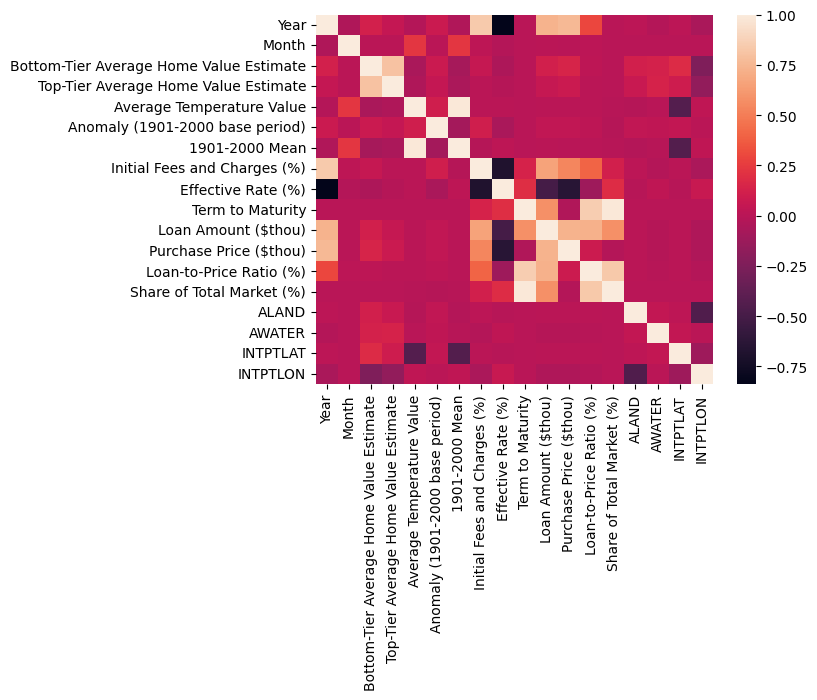

In [31]:
sns.heatmap(data=data.drop(columns=['RegionName', 'State']).corr())

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579894 entries, 0 to 579893
Data columns (total 20 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   Year                                     579894 non-null  int64  
 1   Month                                    579894 non-null  int64  
 2   RegionName                               579894 non-null  object 
 3   State                                    579894 non-null  object 
 4   Bottom-Tier Average Home Value Estimate  579894 non-null  float64
 5   Top-Tier Average Home Value Estimate     579894 non-null  float64
 6   Average Temperature Value                579894 non-null  float64
 7   Anomaly (1901-2000 base period)          579894 non-null  float64
 8   1901-2000 Mean                           579894 non-null  float64
 9   Initial Fees and Charges (%)             579894 non-null  float64
 10  Effective Rate (%)              

In [39]:
#export to csv
data.to_csv("all_data_geo.csv")

### References

1. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html